# Loading and Visualizing raw data

The purpose of this notebook is show how to load and visualize the raw data for one subject at a time. 

First, we start by importing libraries we will need. In addition to the usual Python libraries for data analysis (i.e. `pandas`, `numpy`, `matplotlib`), we will be using `nibabel` to read in image from multiple formats. We will also be using multiple functions from nilearn modules—stats, image, masking, plotting, as seen later on this page.

In [1]:
import pandas as pd
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

%matplotlib inline

Now we will load the T1-weighted images for this subject.

In [2]:
T1 = nib.load('../ds000171/sub-control01/anat/sub-control01_T1w.nii.gz')

## Components of an image object
The image object consist of an image header, an image data array and an affine array. Printing the image object returns the affine and header data.

In [3]:
print(T1)

<class 'nibabel.nifti1.Nifti1Image'>
data shape (256, 256, 176)
affine: 
[[ 2.97016315e-02  4.88067009e-02  1.19803977e+00 -1.11816040e+02]
 [-9.99558806e-01  1.45029102e-03  3.55994403e-02  1.15608246e+02]
 [ 0.00000000e+00  9.98807192e-01 -5.85938878e-02 -1.54224762e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 48
dim             : [  3 256 256 176   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.0000000e+00  1.0000000e+00  1.0000000e+00  1.1999999e+00
  2.3000000e+00  1.0000000e+00  1.0000000e+00  5.2677625e+04]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 175
slice_

Now, let's focus on the image data array.

First, let's look at the shape of the image.

In [27]:
T1.shape

(256, 256, 176)

The article describes the T1-weighted image as follows:
> High-resolution T1-weighted anatomic images were acquired with a 3D MPRAGE sequence (TR/TE = 2300/2.01 msec, flip angle = 9°, FOV = 256 mm, matrix = 256x192, slice thickness = 1 mm).  

To manipulate the data as a numpy array:

In [28]:
T1.get_fdata()

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

We can use the plotting functions from `nilearn` to handle plotting directly by feeding it the NIfTI object.

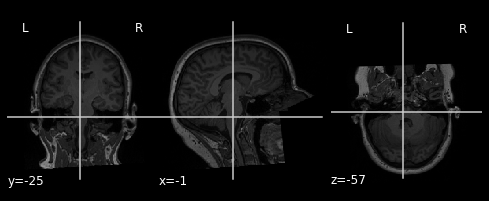

In [7]:
from nilearn.plotting import plot_anat

plot_anat(T1)

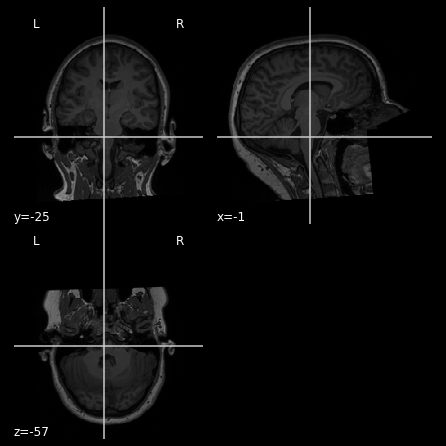

In [8]:
plot_anat(T1,display_mode='tiled')

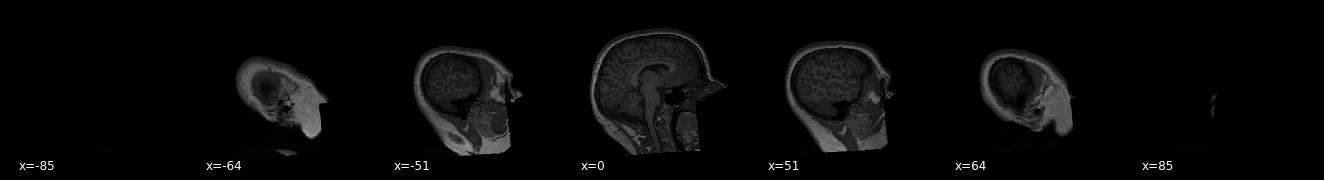

In [9]:
x = T1.shape[0]
plot_anat(T1,
          cut_coords = (-x/3, -x/4, -x/5, 0, 
                       x/5, x/4, x/3),
          display_mode='x')

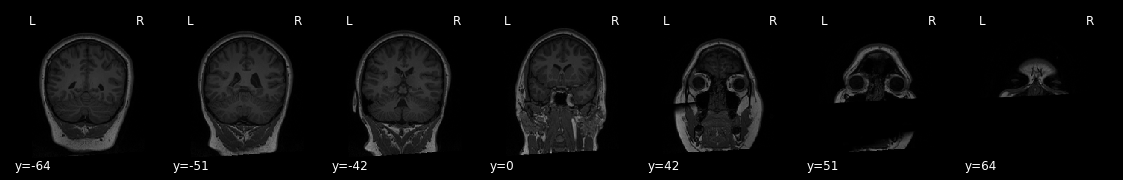

In [10]:
y = T1.shape[1]
plot_anat(T1,
          cut_coords = (-y/4, -y/5, -y/6, 0, 
                       y/6, y/5, y/4), 
          display_mode='y')

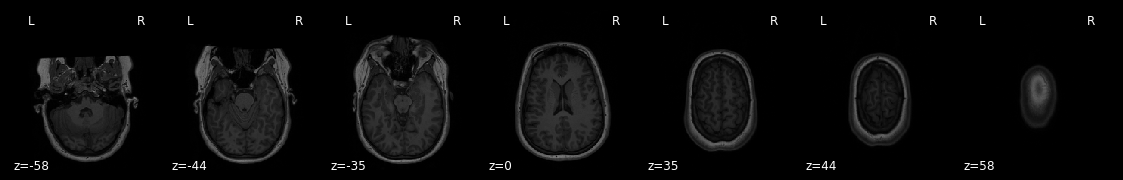

In [11]:
z = T1.shape[2]
plot_anat(T1,
          cut_coords = (-z/3, -z/4, -z/5, 0, 
                       z/5, z/4, z/3),
          display_mode='z')

## Functional images

We can follow similar steps to visualize functional MRI images. Let's load the BOLD run for this subject.

The article describes these images as follows:

> ... five gradient echo blood oxygen level dependent (BOLD) sequences were acquired in 50 interleaved oblique axial slices at a 40° angle (repetition time/echo time [TR/TE] = 3000/25msec, flip angle = 90°, field of view [FOV] = 220 mm, matrix = 64x64, slice thickness = 3 mm,0 mm skip, in-plane resolution = 2.9x2.9 mm, 105 data points, 5 min: 24 sec).

In [12]:
BOLD = nib.load('../ds000171/sub-control01/func/sub-control01_task-music_run-1_bold.nii.gz')
print(BOLD)

<class 'nibabel.nifti1.Nifti1Image'>
data shape (80, 80, 50, 105)
affine: 
[[-2.89823341e+00  0.00000000e+00  1.04698524e-01  1.18931046e+02]
 [-6.50556833e-02  2.22152901e+00 -1.92718816e+00 -7.74534302e+01]
 [ 7.75302127e-02  1.86408401e+00  2.29673338e+00 -1.40277512e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 48
dim             : [  4  80  80  50 105   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.000000e+00  2.900000e+00  2.900000e+00  3.000000e+00  3.000000e+00
  1.000000e+00  2.500000e-01  5.331821e+04]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 49
slice_code   

To visualize a 4D image statically we use an indexing function that works om nifti-image objects

/opt/anaconda3/envs/fmri-rep/lib/python3.7/site-packages/nilearn/image/resampling.py:512: UserWarning: Casting data from int32 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


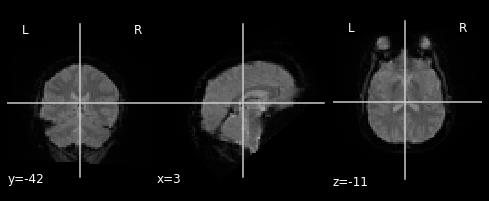

In [13]:
from nilearn.image import index_img

slice0 = index_img(BOLD, 0)

plot_anat(slice0)

Perhaps we can visualize the BOLD signal better using the plot_epi function in nilearn.

/opt/anaconda3/envs/fmri-rep/lib/python3.7/site-packages/nilearn/image/resampling.py:512: UserWarning: Casting data from int32 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


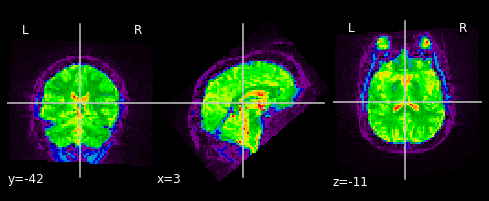

In [14]:
from nilearn.plotting import plot_epi

plot_epi(slice0)

Or we can plot multiple volumes of the same run

/opt/anaconda3/envs/fmri-rep/lib/python3.7/site-packages/nilearn/image/resampling.py:512: UserWarning: Casting data from int32 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/opt/anaconda3/envs/fmri-rep/lib/python3.7/site-packages/nilearn/image/resampling.py:512: UserWarning: Casting data from int32 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/opt/anaconda3/envs/fmri-rep/lib/python3.7/site-packages/nilearn/image/resampling.py:512: UserWarning: Casting data from int32 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/opt/anaconda3/envs/fmri-rep/lib/python3.7/site-packages/nilearn/image/resampling.py:512: UserWarning: Casting data from int32 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/opt/anaconda3/envs/fmri-rep/lib/python3.7/site-packages/nilearn/image/resampling.py:512: UserWarning: Casting data from int32 to float32
  warnings.warn("Casting d

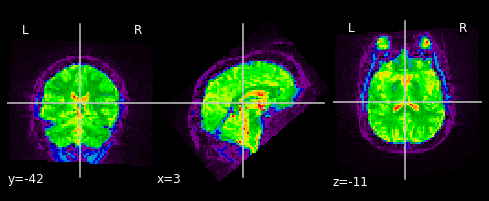

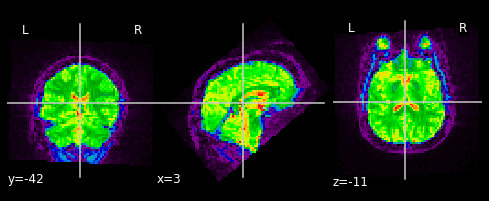

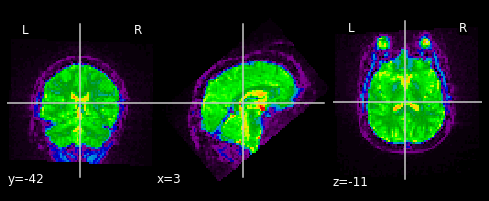

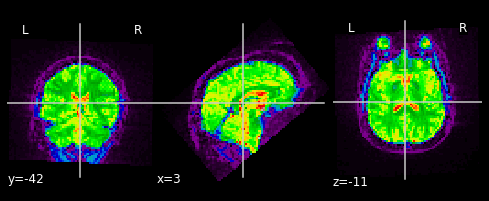

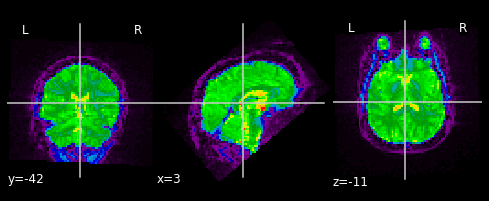

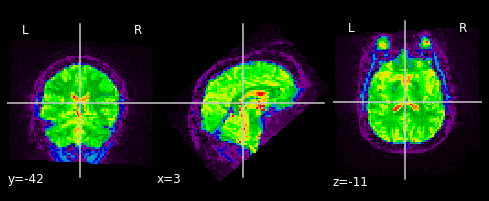

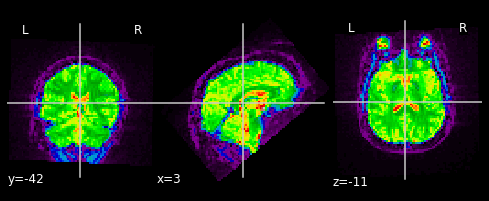

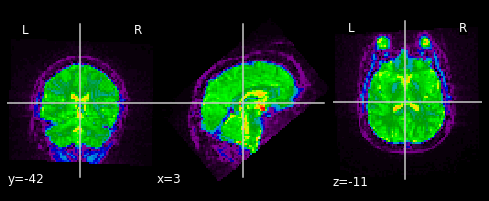

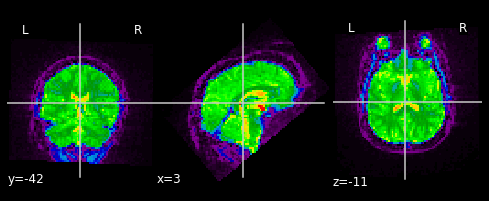

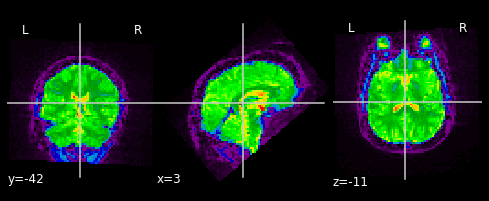

In [33]:
from nilearn.image import iter_img
from warnings import filterwarnings

#plot BOLD runs
for img in enumerate(iter_img(BOLD)):
    plot_epi(img[1])
    
    # only plot first 10 images
    if(img[0] == 9):
        break 

`plot_epi` gives more information than `plot_anat` when applied to functional images because it creates more contrast. Just for fun, let's apply `plot_epi` to the anatomical (T1) image.

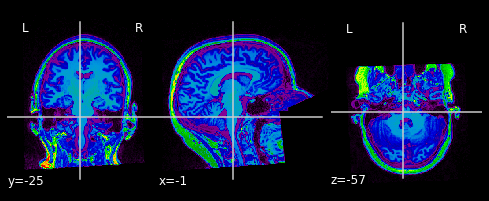

In [16]:
plot_epi(T1)

## Masking

To get better contrast within the brain in our BOLD volumes, we can compute and apply a mask with `nilearn.masking`. Masking is also a preliminary operation to plotting a time-series.

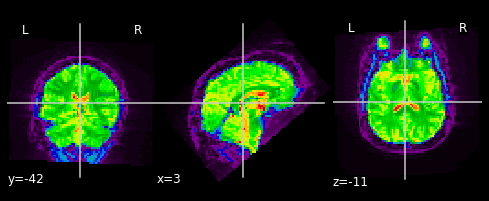

In [17]:
## Compute a mask based on the mean of all imgs and 
## apply it to BOLD volumes in run

from nilearn.image import mean_img
mean_BOLD = mean_img(BOLD)

plot_epi(mean_BOLD)

[[ 739.  734.  807. ...  841.  736. 1037.]
 [ 745.  741.  774. ...  824.  760. 1043.]
 [ 735.  757.  806. ...  821.  736. 1041.]
 ...
 [ 759.  755.  771. ...  880.  770. 1071.]
 [ 762.  766.  749. ...  888.  807. 1058.]
 [ 759.  718.  769. ...  884.  796. 1059.]]


/opt/anaconda3/envs/fmri-rep/lib/python3.7/site-packages/nilearn/image/resampling.py:512: UserWarning: Casting data from int8 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


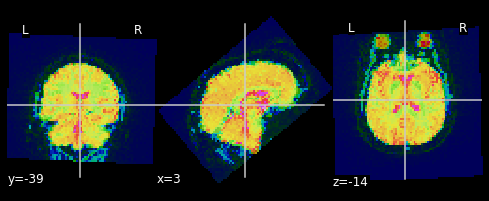

In [18]:
from nilearn.masking import compute_epi_mask, apply_mask
mask = compute_epi_mask(mean_BOLD)
BOLD_masked = apply_mask(BOLD, mask) 

# apply_mask returns an array
print(BOLD_masked)

from nilearn.plotting import plot_roi
plot_roi(index_img(BOLD, 2), mask)

Applying a mask before plotting provides better contrast. Note that some voxels still light up outside the brain, thus this type of masking is not a replacement for proper brain extraction/skull stripping.

## Time-series

Since we now have a masked BOLD run we can do basic plotting of the time series for a subset of the voxels in the run.

Of course, it is impossible to obtain any useful information from a plot that contains all the 48480 voxels in this image. 

In [19]:
BOLD_masked.shape

(105, 48480)

So for the following plot we will select only 5 voxels.

(0.0, 105.0)

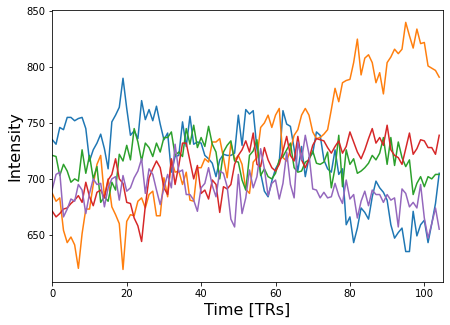

In [22]:
%matplotlib inline

plt.figure(figsize=(7,5))
plt.plot(BOLD_masked[:, 5:10])
plt.xlabel('Time [TRs]', fontsize=16)
plt.ylabel('Intensity', fontsize=16)
plt.xlim(0,105)

This minimal plot shows that there are is consistent variation in voxel intensities without drastic changes in recorded intensities, which may occur due to hardware or software malfunction.

## The events file

Finally, included with the brain data is a table that contains event onsets and durations which can be used to create a design matrix.

In [24]:
task_0 = pd.read_csv('../ds000171/sub-control01/func/sub-control01_task-music_run-1_events.tsv',
                    sep = '\t', header = 0)
task_0

,onset,duration,trial_type
0,0.0,33.0,tones
1,33.0,3.0,response
2,36.0,31.5,negative_music
3,67.5,3.0,response
4,70.5,31.5,tones
5,102.0,3.0,response
6,105.0,31.5,positive_music
7,136.5,3.0,response
8,139.5,31.5,tones
9,171.0,3.0,response


Creating the design matrix should be easy with `nilearn.stats`. 

Note: As of June 15 2020, only the development version of nilearn includes the stats module. Assuming you have git and pip installed in your machine, the development version can be installed from the command line with: ```pip install git+git://github.com/nilearn/nilearn.git```

In [25]:
from nilearn.stats.first_level_model import FirstLevelModel

glm = FirstLevelModel(t_r = 2.5, hrf_model='spm')
glm.fit(BOLD, task_0)
design_matrix = glm.design_matrices_[0]
print(design_matrix)

       negative_music  positive_music  response     tones   drift_1   drift_2  \
0.0               0.0        0.000000  0.000000  0.000000  0.137998  0.137951   
2.5               0.0        0.000000  0.000000  0.048760  0.137874  0.137458   
5.0               0.0        0.000000  0.000000  0.457347  0.137627  0.136472   
7.5               0.0        0.000000  0.000000  0.907874  0.137257  0.134997   
10.0              0.0        0.000000  0.000000  1.109668  0.136764  0.133040   
...               ...             ...       ...       ...       ...       ...   
250.0             0.0        0.836753  0.272915 -0.109668 -0.136764  0.133040   
252.5             0.0        1.086818  0.056854 -0.143672 -0.137257  0.134997   
255.0             0.0        1.144712 -0.034296 -0.110417 -0.137627  0.136472   
257.5             0.0        1.119289 -0.054369 -0.064920 -0.137874  0.137458   
260.0             0.0        1.073486 -0.042399 -0.031088 -0.137998  0.137951   

        drift_3   drift_4  

And the design matrix can be plotted also with nilearn.

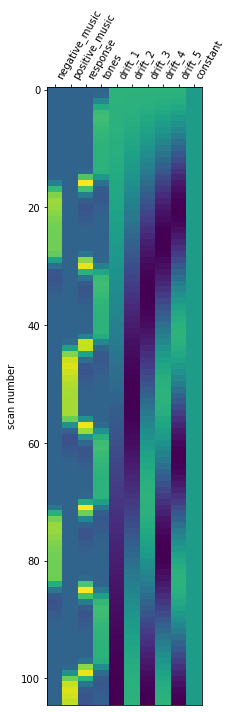

In [26]:
from nilearn.reporting import plot_design_matrix
plot_design_matrix(design_matrix)